# Problem Description

* Recognizing multi-digit numbers in photographs captured at street level is an
important component of modern-day map making. A classic example of a
corpus of such street level photographs is Google’s Street View imagery
comprised of hundreds of millions of geo-located 360 degree panoramic
images. The ability to automatically transcribe an address number from a geolocated patch of pixels and associate the transcribed number with a known
street address helps pinpoint, with a high degree of accuracy, the
location of the building it represents.
* More broadly, recognizing numbers in photographs is a problem of interest to
the optical character recognition community. While OCR on constrained
domains like document processing is well studied, arbitrary multi-character text
recognition in photographs is still highly challenging. This difficulty arises due to
the wide variability in the visual appearance of text in the wild on account of a
large range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such
as lighting, shadows, secularities, and occlusions as well as by image acquisition
factors such as resolution, motion, and focus blurs

# The Street View House Numbers (SVHN) Dataset 

SVHN is a real-world image dataset for developing machine learning and object
recognition algorithms with minimal requirement on data formatting but comes
from a significantly harder, unsolved, real world problem (recognizing digits and
numbers in natural scene images). SVHN is obtained from house numbers in
Google Street View images.

# Importing Libraries

In [0]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
%matplotlib inline

# Reading Data

In [20]:
h5f = h5py.File('/content/drive/My Drive/neural_1_ass/SVHN_single_grey1.h5','r')
print("Lets see what h5py file consists:",h5f.keys())
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
h5f.close()

Lets see what h5py file consists: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


**Basic EDA**

In [3]:
number_tr = {}
for label in y_train:
    if label in number_tr:
        number_tr[label]+=1
    else:
        number_tr[label]=1
print("Number of values in train labels", number_tr)

number_val = {}
count = 0
for label in y_val:
    if label in number_val:
        number_val[label]+=1
    else:
        number_val[label]=1
print("Number of values in val labels", number_val)

number_te = {}
count = 0
for label in y_test:
    if label in number_te:
        number_te[label]+=1
    else:
        number_te[label]=1
print("Number of values in test labels", number_te)

Number of values in train labels {2: 4197, 6: 4168, 7: 4192, 4: 4188, 0: 4186, 3: 4281, 1: 4172, 8: 4188, 5: 4232, 9: 4196}
Number of values in val labels {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}
Number of values in test labels {1: 1828, 7: 1808, 2: 1803, 9: 1804, 0: 1814, 8: 1812, 4: 1812, 3: 1719, 5: 1768, 6: 1832}


Observations:
* All three data sets have amost same values, so our data is balanced

**Visualizing first 25 X_train images**

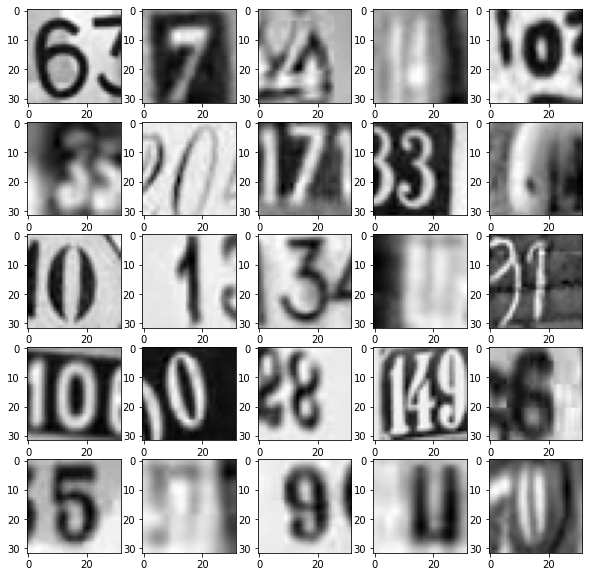

In [4]:
fig=plt.figure(figsize=(10,10))
columns=5
rows=5
for i in range(1, columns*rows+1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(X_train[i],cmap='gray')
plt.show()

**Visualizing first 25 X_test images**

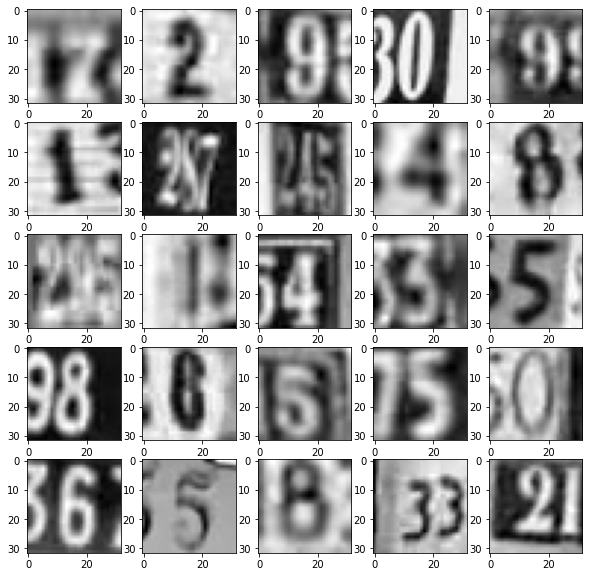

In [5]:
fig=plt.figure(figsize=(10,10))
columns=5
rows=5
for i in range(1, columns*rows+1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(X_test[i],cmap='gray')
plt.show()

**Visualizing first 25 X_cv images**

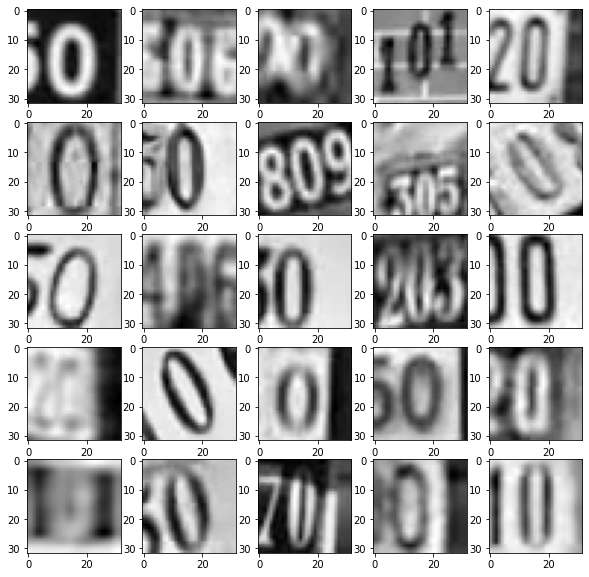

In [6]:
fig=plt.figure(figsize=(10,10))
columns=5
rows=5
for i in range(1, columns*rows+1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(X_val[i],cmap='gray')
plt.show()

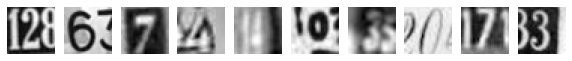

label for each of the above train image: [2 6 7 4 4 0 3 0 7 3]


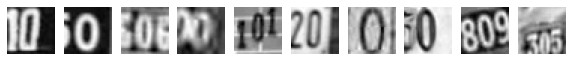

label for each of the above validation image: [0 0 0 0 0 0 0 0 0 0]


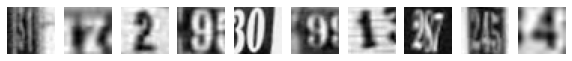

label for each of the above test image: [1 7 2 9 0 9 1 8 4 4]


In [21]:
# visualizing the first 10 images in the train and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above train image: %s' % (y_train[0:10]))
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_val[i],cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above validation image: %s' % (y_val[0:10]))
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above test image: %s' % (y_test[0:10]))

**Data Modelling for Neural Networks**

In [0]:
#reshaping matrix to linear array
X_train = X_train.reshape(X_train.shape[0],(X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape(X_test.shape[0],(X_test.shape[1]*X_test.shape[2]))
X_val = X_val.reshape(X_val.shape[0],(X_val.shape[1]*X_val.shape[2]))

In [22]:
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)
print("X val shape",X_val.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)
print("y val shape",y_val.shape)

X train shape (42000, 1024)
X test shape (18000, 1024)
X val shape (60000, 1024)
y train shape (42000,)
y test shape (18000,)
y val shape (60000,)


In [0]:
#making the mean=0 and std=1 for x_train,x_val,X_test
X_train = (X_train-X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()
X_val = (X_val-X_val.mean())/X_val.std()

In [24]:
#one hot encoding of y that is labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)
print("X val shape",X_val.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)
print("y val shape",y_val.shape)

X train shape (42000, 1024)
X test shape (18000, 1024)
X val shape (60000, 1024)
y train shape (42000, 10)
y test shape (18000, 10)
y val shape (60000, 10)


# Keras Model

In [0]:
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf

In [0]:
#bla dict is used just for debugging purpose
bla = {'initialization': [],
          'optimizer_nn':[],
          'loss_nn':[],
          'batch_size': [],
          'epoch_size': [],
          'test accuracy': []}
def keras_model(initializer,optimizer,loss,batch,epochs,ver):
  bla['initialization'].append(initializer)
  bla['optimizer_nn'].append(optimizer)
  bla['loss_nn'].append(loss)
  bla['batch_size'].append(batch)
  bla['epoch_size'].append(epochs)

  model = Sequential()
  #Adding Input layer and activation functions ReLU
  model.add(Dense(1024, kernel_initializer=initializer,input_shape = (1024, )))
  #Adding Activation function
  model.add(Activation('relu'))

  #Hidden Layer 1
  #Adding first Hidden layer
  model.add(Dense(256, kernel_initializer=initializer))
  #Adding Activation function
  model.add(Activation('relu'))

  #Hidden Layer 2
  #Adding second Hidden layer
  model.add(Dense(128, kernel_initializer=initializer))
  #Adding Activation function
  model.add(Activation('relu'))

  #Hidden Layer 3
  #Adding third Hidden layer
  model.add(Dense(64, kernel_initializer=initializer))
  #Adding Activation function
  model.add(Activation('relu'))

  #Hidden Layer 4
  #Adding fourth Hidden layer
  model.add(Dense(32, kernel_initializer=initializer))
  #Adding Activation function
  model.add(Activation('relu'))

  # Output Layer
  #Adding output layer which is of 10 nodes (digits)
  model.add(Dense(10))
  #Adding Activation function
  # Here, we are using softmax function because we have multiclass classsification
  model.add(Activation('softmax'))
  model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
  history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = batch, epochs = epochs, verbose = ver)
  results = model.evaluate(X_test,y_test)
  bla['test accuracy'].append(results[1])
  print("Test Accuracy:",results[1])
  print("Test Loss:",results[0])

  return history, results

In [0]:
epocs = 80
initializer = ['uniform','he_normal','glorot_normal']
optimizers = ['sgd','adam','RMSprop','Adagrad']
batc = [32,64]
cols = ['initialization', 'optimizer_nn', 'loss_nn', 'batch_size', 'epoch_size', 'train accuracy', 'val accuracy', 'test accuracy','train loss', 'val loss', 'test loss']
compare_df = pd.DataFrame(columns=cols)

for ker in initializer:
  for optimizer in optimizers:
    for ba in batc:
      print('#'*100)
      print(" "*100)
      print("initializer:", ker)
      print("optimizer:", optimizer)
      print("batch size:", ba)
      hist, model = keras_model(ker,optimizer,'categorical_crossentropy',ba,epocs,1)
      tempResultsDf = pd.DataFrame({'initialization':[ker], 'optimizer_nn': [optimizer], 'loss_nn': ['categorical_crossentropy'], 'batch_size': [ba], 'epoch_size': [epocs],'train accuracy':[hist.history['accuracy'][-1]], 'val accuracy': [hist.history['val_accuracy'][-1]], 'test accuracy': [model[1]],'train loss':[hist.history['loss'][-1]], 'val loss': [hist.history['val_loss'][-1]],'test loss': [model[0]]})
      compare_df = pd.concat([compare_df, tempResultsDf])
      print(" "*100)
compare_df

####################################################################################################
                                                                                                    
initializer: uniform
optimizer: sgd
batch size: 32
Train on 42000 samples, validate on 60000 samples
Epoch 1/80
42000/42000 [==============================] - 9s 222us/step - loss: 2.3025 - accuracy: 0.1016 - val_loss: 2.3022 - val_accuracy: 0.1103
Epoch 2/80
42000/42000 [==============================] - 9s 211us/step - loss: 2.3019 - accuracy: 0.1072 - val_loss: 2.3013 - val_accuracy: 0.1082
Epoch 3/80
42000/42000 [==============================] - 9s 218us/step - loss: 2.3005 - accuracy: 0.1146 - val_loss: 2.2989 - val_accuracy: 0.1361
Epoch 4/80
42000/42000 [==============================] - 9s 209us/step - loss: 2.2946 - accuracy: 0.1647 - val_loss: 2.2849 - val_accuracy: 0.2057
Epoch 5/80
42000/42000 [==============================] - 9s 203us/step - loss: 2.1775 - accuracy: 0.2003

,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,uniform,sgd,categorical_crossentropy,32,80,0.989381,0.948000,0.838278,0.032998,0.430561,1.390577
0,uniform,sgd,categorical_crossentropy,64,80,0.983905,0.925717,0.818944,0.054221,0.433555,1.241619
0,uniform,adam,categorical_crossentropy,32,80,0.960310,0.921533,0.833833,0.145031,0.429565,1.093884
0,uniform,adam,categorical_crossentropy,64,80,0.971714,0.932133,0.837389,0.096596,0.380708,1.054292
0,uniform,RMSprop,categorical_crossentropy,32,80,0.177524,0.169917,0.164167,4.733351,2.575880,3.413000
0,uniform,RMSprop,categorical_crossentropy,64,80,0.919286,0.872950,0.802278,0.408370,1.256907,3.361487
0,uniform,Adagrad,categorical_crossentropy,32,80,0.993000,0.950067,0.839167,0.029976,0.379074,1.227416
0,uniform,Adagrad,categorical_crossentropy,64,80,0.995881,0.951533,0.842778,0.019746,0.382283,1.244642
0,he_normal,sgd,categorical_crossentropy,32,80,0.992048,0.944050,0.830278,0.025449,0.474913,1.525340
0,he_normal,sgd,categorical_crossentropy,64,80,0.995119,0.947617,0.832778,0.017720,0.429459,1.400959


In [0]:
compare_df[compare_df['optimizer_nn']=='sgd']

,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,uniform,sgd,categorical_crossentropy,32,80,0.989381,0.948000,0.838278,0.032998,0.430561,1.390577
0,uniform,sgd,categorical_crossentropy,64,80,0.983905,0.925717,0.818944,0.054221,0.433555,1.241619
0,he_normal,sgd,categorical_crossentropy,32,80,0.992048,0.944050,0.830278,0.025449,0.474913,1.525340
0,he_normal,sgd,categorical_crossentropy,64,80,0.995119,0.947617,0.832778,0.017720,0.429459,1.400959
0,glorot_normal,sgd,categorical_crossentropy,32,80,0.994619,0.952850,0.849222,0.018333,0.433216,1.418376
0,glorot_normal,sgd,categorical_crossentropy,64,80,0.982881,0.944983,0.837444,0.055732,0.422013,1.337146


In [0]:
compare_df[compare_df['optimizer_nn']=='adam']

,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,uniform,adam,categorical_crossentropy,32,80,0.960310,0.921533,0.833833,0.145031,0.429565,1.093884
0,uniform,adam,categorical_crossentropy,64,80,0.971714,0.932133,0.837389,0.096596,0.380708,1.054292
0,he_normal,adam,categorical_crossentropy,32,80,0.950643,0.922817,0.836556,0.169472,0.404543,1.020551
0,he_normal,adam,categorical_crossentropy,64,80,0.965905,0.923183,0.834444,0.114411,0.411122,1.071936
0,glorot_normal,adam,categorical_crossentropy,32,80,0.958357,0.926917,0.840500,0.139691,0.418887,1.100715
0,glorot_normal,adam,categorical_crossentropy,64,80,0.967024,0.927400,0.836333,0.109170,0.406450,1.093169


In [0]:
compare_df[compare_df['optimizer_nn']=='RMSprop']

,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,uniform,RMSprop,categorical_crossentropy,32,80,0.177524,0.169917,0.164167,4.733351,2.575880,3.413000
0,uniform,RMSprop,categorical_crossentropy,64,80,0.919286,0.872950,0.802278,0.408370,1.256907,3.361487
0,he_normal,RMSprop,categorical_crossentropy,32,80,0.139238,0.128533,0.123444,2.886795,2.254367,2.296396
0,he_normal,RMSprop,categorical_crossentropy,64,80,0.869119,0.789683,0.743500,0.545639,2.184176,4.446015
0,glorot_normal,RMSprop,categorical_crossentropy,32,80,0.134595,0.133683,0.131611,3.132911,2.349556,2.645410
0,glorot_normal,RMSprop,categorical_crossentropy,64,80,0.910524,0.902533,0.837500,0.425370,1.259500,3.504402


In [0]:
compare_df[compare_df['optimizer_nn']=='Adagrad']

,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,uniform,Adagrad,categorical_crossentropy,32,80,0.993000,0.950067,0.839167,0.029976,0.379074,1.227416
0,uniform,Adagrad,categorical_crossentropy,64,80,0.995881,0.951533,0.842778,0.019746,0.382283,1.244642
0,he_normal,Adagrad,categorical_crossentropy,32,80,1.000000,0.951617,0.838833,0.003118,0.377294,1.249076
0,he_normal,Adagrad,categorical_crossentropy,64,80,0.999929,0.952217,0.840833,0.004357,0.368411,1.215938
0,glorot_normal,Adagrad,categorical_crossentropy,32,80,0.999810,0.952383,0.841556,0.004786,0.391016,1.291441
0,glorot_normal,Adagrad,categorical_crossentropy,64,80,0.999929,0.952867,0.843111,0.003348,0.372547,1.232578


In [0]:
with open('/content/drive/My Drive/Colab Notebooks/res_1.csv', 'w') as f:
  compare_df.to_csv(f)

In [0]:
epocs = 50
initializer = ['he_uniform','glorot_uniform']
optimizers = ['sgd','adam','RMSprop','Adagrad']
batc = [32,64]
cols = ['initialization', 'optimizer_nn', 'loss_nn', 'batch_size', 'epoch_size', 'train accuracy', 'val accuracy', 'test accuracy','train loss', 'val loss', 'test loss']
compare_d = pd.DataFrame(columns=cols)
for ker in initializer:
  for optimizer in optimizers:
    for ba in batc:
      print('#'*100)
      print(" "*100)
      print("initializer:", ker)
      print("optimizer:", optimizer)
      print("batch size:", ba)
      hist, model = keras_model(ker,optimizer,'categorical_crossentropy',ba,epocs,1)
      tempResultsDf = pd.DataFrame({'initialization':[ker], 'optimizer_nn': [optimizer], 'loss_nn': ['categorical_crossentropy'], 'batch_size': [ba], 'epoch_size': [epocs],'train accuracy':[hist.history['accuracy'][-1]], 'val accuracy': [hist.history['val_accuracy'][-1]], 'test accuracy': [model[1]],'train loss':[hist.history['loss'][-1]], 'val loss': [hist.history['val_loss'][-1]],'test loss': [model[0]]})
      compare_d = pd.concat([compare_d, tempResultsDf])
      print(" "*100)
compare_d

####################################################################################################
                                                                                                    
initializer: he_uniform
optimizer: sgd
batch size: 32
Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 9s 209us/step - loss: 1.6254 - accuracy: 0.4500 - val_loss: 1.0945 - val_accuracy: 0.6552
Epoch 2/50
42000/42000 [==============================] - 8s 196us/step - loss: 0.9889 - accuracy: 0.6919 - val_loss: 0.8800 - val_accuracy: 0.7282
Epoch 3/50
42000/42000 [==============================] - 9s 204us/step - loss: 0.8004 - accuracy: 0.7523 - val_loss: 0.7504 - val_accuracy: 0.7686
Epoch 4/50
42000/42000 [==============================] - 8s 202us/step - loss: 0.6877 - accuracy: 0.7867 - val_loss: 0.6838 - val_accuracy: 0.7902
Epoch 5/50
42000/42000 [==============================] - 8s 197us/step - loss: 0.6075 - accuracy: 0.8

,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,he_uniform,sgd,categorical_crossentropy,32,50,0.980167,0.932417,0.826222,0.063274,0.409591,1.200749
0,he_uniform,sgd,categorical_crossentropy,64,50,0.983929,0.935917,0.826111,0.051778,0.397442,1.196555
0,he_uniform,adam,categorical_crossentropy,32,50,0.935214,0.911467,0.838000,0.216971,0.376823,0.825976
0,he_uniform,adam,categorical_crossentropy,64,50,0.951429,0.922033,0.836000,0.153738,0.364889,0.909321
0,he_uniform,RMSprop,categorical_crossentropy,32,50,0.153095,0.141967,0.139333,2.367986,2.272483,2.413727
0,he_uniform,RMSprop,categorical_crossentropy,64,50,0.905452,0.882083,0.821667,0.349825,0.614273,1.232478
0,he_uniform,Adagrad,categorical_crossentropy,32,50,0.995500,0.949967,0.840056,0.025309,0.315485,1.000615
0,he_uniform,Adagrad,categorical_crossentropy,64,50,0.994976,0.947200,0.835167,0.029713,0.316276,0.986454
0,glorot_uniform,sgd,categorical_crossentropy,32,50,0.979381,0.942300,0.840556,0.062960,0.374081,1.143799
0,glorot_uniform,sgd,categorical_crossentropy,64,50,0.981833,0.915217,0.813944,0.057712,0.493002,1.281618


In [0]:
compare_d[compare_d['optimizer_nn']=='sgd']

,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,he_uniform,sgd,categorical_crossentropy,32,50,0.980167,0.932417,0.826222,0.063274,0.409591,1.200749
0,he_uniform,sgd,categorical_crossentropy,64,50,0.983929,0.935917,0.826111,0.051778,0.397442,1.196555
0,glorot_uniform,sgd,categorical_crossentropy,32,50,0.979381,0.942300,0.840556,0.062960,0.374081,1.143799
0,glorot_uniform,sgd,categorical_crossentropy,64,50,0.981833,0.915217,0.813944,0.057712,0.493002,1.281618


In [0]:
compare_d[compare_d['optimizer_nn']=='adam']

,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,he_uniform,adam,categorical_crossentropy,32,50,0.935214,0.911467,0.838000,0.216971,0.376823,0.825976
0,he_uniform,adam,categorical_crossentropy,64,50,0.951429,0.922033,0.836000,0.153738,0.364889,0.909321
0,glorot_uniform,adam,categorical_crossentropy,32,50,0.935500,0.909950,0.833444,0.214328,0.400506,0.880753
0,glorot_uniform,adam,categorical_crossentropy,64,50,0.944500,0.916100,0.833944,0.176577,0.379339,0.891134


In [0]:
compare_d[compare_d['optimizer_nn']=='RMSprop']

,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,he_uniform,RMSprop,categorical_crossentropy,32,50,0.153095,0.141967,0.139333,2.367986,2.272483,2.413727
0,he_uniform,RMSprop,categorical_crossentropy,64,50,0.905452,0.882083,0.821667,0.349825,0.614273,1.232478
0,glorot_uniform,RMSprop,categorical_crossentropy,32,50,0.164500,0.157717,0.151944,3.528424,2.303395,2.606869
0,glorot_uniform,RMSprop,categorical_crossentropy,64,50,0.898452,0.884883,0.825056,0.434293,0.750962,1.752841


In [0]:
compare_d[compare_d['optimizer_nn']=='Adagrad']

,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,he_uniform,Adagrad,categorical_crossentropy,32,50,0.995500,0.949967,0.840056,0.025309,0.315485,1.000615
0,he_uniform,Adagrad,categorical_crossentropy,64,50,0.994976,0.947200,0.835167,0.029713,0.316276,0.986454
0,glorot_uniform,Adagrad,categorical_crossentropy,32,50,0.995095,0.952817,0.847833,0.025526,0.300950,0.960616
0,glorot_uniform,Adagrad,categorical_crossentropy,64,50,0.995167,0.943483,0.836444,0.029025,0.329999,1.000782


In [0]:
with open('/content/drive/My Drive/Colab Notebooks/res_2.csv', 'w') as f:
  compare_d.to_csv(f)

# The best models upto now are given in the below cell, then we shall improve them by varying other parameters such as optimizers learning rate


We need to choose parameters where there should be less overfit.

In [0]:
re1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/res_1.csv')
re2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/res_2.csv')
re = pd.concat([re1,re2])
re

,Unnamed: 0,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,0,uniform,sgd,categorical_crossentropy,32,80,0.989381,0.948000,0.838278,0.032998,0.430561,1.390577
1,0,uniform,sgd,categorical_crossentropy,64,80,0.983905,0.925717,0.818944,0.054221,0.433555,1.241619
2,0,uniform,adam,categorical_crossentropy,32,80,0.960310,0.921533,0.833833,0.145031,0.429565,1.093884
3,0,uniform,adam,categorical_crossentropy,64,80,0.971714,0.932133,0.837389,0.096596,0.380708,1.054292
4,0,uniform,RMSprop,categorical_crossentropy,32,80,0.177524,0.169917,0.164167,4.733351,2.575880,3.413000
5,0,uniform,RMSprop,categorical_crossentropy,64,80,0.919286,0.872950,0.802278,0.408370,1.256907,3.361487
6,0,uniform,Adagrad,categorical_crossentropy,32,80,0.993000,0.950067,0.839167,0.029976,0.379074,1.227416
7,0,uniform,Adagrad,categorical_crossentropy,64,80,0.995881,0.951533,0.842778,0.019746,0.382283,1.244642
8,0,he_normal,sgd,categorical_crossentropy,32,80,0.992048,0.944050,0.830278,0.025449,0.474913,1.525340
9,0,he_normal,sgd,categorical_crossentropy,64,80,0.995119,0.947617,0.832778,0.017720,0.429459,1.400959


Observations:
* When the test acuuracy is greater than 0.84, our train accuracy is almost equal to one and val accuracy reaches 0.95+ which is clearly an overfit
* Let us compromise a little bit of test accuracy and go with the one which has test accuracy between 0.835 and 0.834
* As we can see adam and either of ( glorat_normal, glorat_uniform) seems better for our model, but these can be further improved if we play around with the learning rate

In [0]:
epocs = 80
initializer = ['glorot_normal']
from keras import optimizers
optimizer_lr = [0.00001, 0.0001, 0.001, 0.1, 0.5]
batc = [32,64]
cols = ['initialization', 'optimizer','optimizer_lr', 'loss_nn', 'batch_size', 'epoch_size', 'train accuracy', 'val accuracy', 'test accuracy','train loss', 'val loss', 'test loss']
compare = pd.DataFrame(columns=cols)

for ker in initializer:
  for optimi in optimizer_lr:
    for ba in batc:
      print('#'*100)
      print(" "*100)
      print("initializer:", ker)
      print("optimizer Learning Rate:", optimi)
      print("batch size:", ba)
      adam_opt = optimizers.adam(lr = optimi)
      hist, model = keras_model(ker, adam_opt,'categorical_crossentropy',ba,epocs,1)
      tempResultsDf = pd.DataFrame({'initialization':[ker], 'optimizer':['Adam'], 'optimizer_lr': [optimi], 'loss_nn': ['categorical_crossentropy'], 'batch_size': [ba], 'epoch_size': [epocs],'train accuracy':[hist.history['accuracy'][-1]], 'val accuracy': [hist.history['val_accuracy'][-1]], 'test accuracy': [model[1]],'train loss':[hist.history['loss'][-1]], 'val loss': [hist.history['val_loss'][-1]],'test loss': [model[0]]})
      compare = pd.concat([compare, tempResultsDf])
      print(" "*100)
compare

####################################################################################################
                                                                                                    
initializer: glorot_normal
optimizer Learning Rate: 1e-05
batch size: 32
Train on 42000 samples, validate on 60000 samples
Epoch 1/80
42000/42000 [==============================] - 11s 256us/step - loss: 2.2120 - accuracy: 0.1994 - val_loss: 2.0668 - val_accuracy: 0.2831
Epoch 2/80
42000/42000 [==============================] - 10s 244us/step - loss: 1.9068 - accuracy: 0.3761 - val_loss: 1.7217 - val_accuracy: 0.4791
Epoch 3/80
42000/42000 [==============================] - 10s 245us/step - loss: 1.5709 - accuracy: 0.5432 - val_loss: 1.4268 - val_accuracy: 0.6041
Epoch 4/80
42000/42000 [==============================] - 10s 249us/step - loss: 1.3231 - accuracy: 0.6297 - val_loss: 1.2305 - val_accuracy: 0.6564
Epoch 5/80
42000/42000 [==============================] - 10s 243us/step - loss

,initialization,optimizer,optimizer_lr,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,glorot_normal,Adam,0.00001,categorical_crossentropy,32,80,0.974667,0.936883,0.835444,0.112915,0.285041,0.712660
0,glorot_normal,Adam,0.00001,categorical_crossentropy,64,80,0.950452,0.915333,0.825278,0.199186,0.336585,0.673792
0,glorot_normal,Adam,0.00010,categorical_crossentropy,32,80,0.985738,0.945633,0.840667,0.047221,0.426965,1.354301
0,glorot_normal,Adam,0.00010,categorical_crossentropy,64,80,0.986714,0.945383,0.843222,0.041416,0.401097,1.256190
0,glorot_normal,Adam,0.00100,categorical_crossentropy,32,80,0.953095,0.928467,0.835778,0.161399,0.388151,1.045278
0,glorot_normal,Adam,0.00100,categorical_crossentropy,64,80,0.963024,0.917450,0.829111,0.125650,0.420861,1.056400
0,glorot_normal,Adam,0.10000,categorical_crossentropy,32,80,0.099762,0.100000,0.101556,2.315604,2.313027,2.313237
0,glorot_normal,Adam,0.10000,categorical_crossentropy,64,80,0.102643,0.100000,0.100667,2.311494,2.307754,2.307270
0,glorot_normal,Adam,0.50000,categorical_crossentropy,32,80,0.101738,0.100033,0.098278,2.358407,672.067808,2718.305179
0,glorot_normal,Adam,0.50000,categorical_crossentropy,64,80,0.097190,0.100000,0.101556,2.341444,2.332082,2.332454


In [0]:
with open('/content/drive/My Drive/Colab Notebooks/adam_lr.csv', 'w') as f:
  compare.to_csv(f)

In [0]:
epocs = 80
initializer = ['glorot_normal']
from keras import optimizers
optimizer_lr = [0.0001,0.0002,0.0005]
batc = [64, 128]
cols = ['initialization', 'optimizer','optimizer_lr', 'loss_nn', 'batch_size', 'epoch_size', 'train accuracy', 'val accuracy', 'test accuracy','train loss', 'val loss', 'test loss']
compar = pd.DataFrame(columns=cols)

for ker in initializer:
  for optimi in optimizer_lr:
    for ba in batc:
      print('#'*100)
      print(" "*100)
      print("initializer:", ker)
      print("optimizer Learning Rate:", optimi)
      print("batch size:", ba)
      adam_opt = optimizers.adam(lr = optimi)
      hist, model = keras_model(ker, adam_opt,'categorical_crossentropy',ba,epocs,1)
      tempResultsDf = pd.DataFrame({'initialization':[ker], 'optimizer':['Adam'], 'optimizer_lr': [optimi], 'loss_nn': ['categorical_crossentropy'], 'batch_size': [ba], 'epoch_size': [epocs],'train accuracy':[hist.history['accuracy'][-1]], 'val accuracy': [hist.history['val_accuracy'][-1]], 'test accuracy': [model[1]],'train loss':[hist.history['loss'][-1]], 'val loss': [hist.history['val_loss'][-1]],'test loss': [model[0]]})
      compar = pd.concat([compar, tempResultsDf])
      print(" "*100)
compar


####################################################################################################
                                                                                                    
initializer: glorot_normal
optimizer Learning Rate: 0.0001
batch size: 64
Train on 42000 samples, validate on 60000 samples
Epoch 1/80
42000/42000 [==============================] - 5s 129us/step - loss: 1.5032 - accuracy: 0.5077 - val_loss: 1.0084 - val_accuracy: 0.6942
Epoch 2/80
42000/42000 [==============================] - 5s 124us/step - loss: 0.8892 - accuracy: 0.7310 - val_loss: 0.7804 - val_accuracy: 0.7660
Epoch 3/80
42000/42000 [==============================] - 6s 132us/step - loss: 0.7243 - accuracy: 0.7816 - val_loss: 0.6713 - val_accuracy: 0.8001
Epoch 4/80
42000/42000 [==============================] - 6s 131us/step - loss: 0.6295 - accuracy: 0.8083 - val_loss: 0.6093 - val_accuracy: 0.8173
Epoch 5/80
42000/42000 [==============================] - 5s 121us/step - loss: 0.

,initialization,optimizer,optimizer_lr,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,glorot_normal,Adam,0.0001,categorical_crossentropy,64,80,0.984429,0.944833,0.841667,0.048046,0.405244,1.269072
0,glorot_normal,Adam,0.0001,categorical_crossentropy,128,80,0.987167,0.946950,0.843667,0.042472,0.364538,1.147353
0,glorot_normal,Adam,0.0002,categorical_crossentropy,64,80,0.982048,0.940433,0.838167,0.056486,0.457733,1.406557
0,glorot_normal,Adam,0.0002,categorical_crossentropy,128,80,0.982429,0.940800,0.835667,0.056099,0.437604,1.355005
0,glorot_normal,Adam,0.0005,categorical_crossentropy,64,80,0.981548,0.940167,0.840000,0.061303,0.436832,1.337633
0,glorot_normal,Adam,0.0005,categorical_crossentropy,128,80,0.984333,0.946433,0.844611,0.049911,0.432283,1.362923


In [0]:
with open('/content/drive/My Drive/Colab Notebooks/adam_lr_2.csv', 'w') as f:
  compare.to_csv(f)

In [0]:
lr = pd.read_csv('/content/drive/My Drive/Colab Notebooks/adam_lr_2.csv')
lr

,Unnamed: 0,initialization,optimizer,optimizer_lr,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,0,glorot_normal,Adam,0.00001,categorical_crossentropy,32,80,0.974667,0.936883,0.835444,0.112915,0.285041,0.712660
1,0,glorot_normal,Adam,0.00001,categorical_crossentropy,64,80,0.950452,0.915333,0.825278,0.199186,0.336585,0.673792
2,0,glorot_normal,Adam,0.00010,categorical_crossentropy,32,80,0.985738,0.945633,0.840667,0.047221,0.426965,1.354301
3,0,glorot_normal,Adam,0.00010,categorical_crossentropy,64,80,0.986714,0.945383,0.843222,0.041416,0.401097,1.256190
4,0,glorot_normal,Adam,0.00100,categorical_crossentropy,32,80,0.953095,0.928467,0.835778,0.161399,0.388151,1.045278
5,0,glorot_normal,Adam,0.00100,categorical_crossentropy,64,80,0.963024,0.917450,0.829111,0.125650,0.420861,1.056400
6,0,glorot_normal,Adam,0.10000,categorical_crossentropy,32,80,0.099762,0.100000,0.101556,2.315604,2.313027,2.313237
7,0,glorot_normal,Adam,0.10000,categorical_crossentropy,64,80,0.102643,0.100000,0.100667,2.311494,2.307754,2.307270
8,0,glorot_normal,Adam,0.50000,categorical_crossentropy,32,80,0.101738,0.100033,0.098278,2.358407,672.067808,2718.305179
9,0,glorot_normal,Adam,0.50000,categorical_crossentropy,64,80,0.097190,0.100000,0.101556,2.341444,2.332082,2.332454


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
activation_50 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_51 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_52 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)               

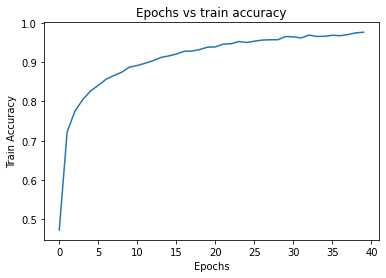

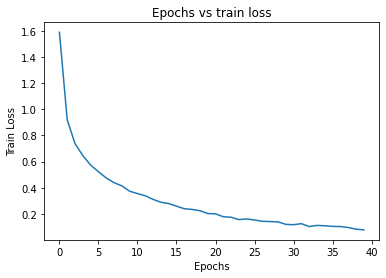

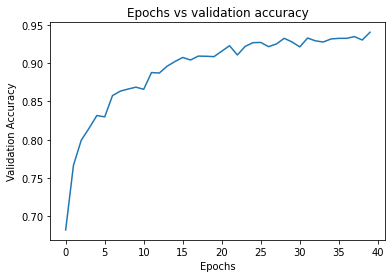

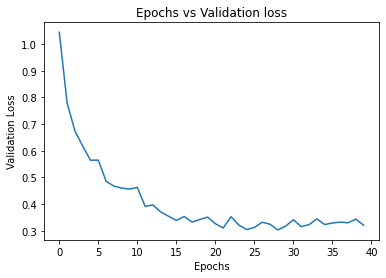

Confusion Matrix
[[1574   28    6   17   30   15   37   28   35   44]
 [  27 1553   26   42   74   13   15   54   18    6]
 [  17   19 1554   35   33   24    9   58   27   27]
 [  24   32   37 1355   21  130   21   36   44   19]
 [  14   48   23   29 1606   18   27   11   19   17]
 [  17   12   15   78   11 1520   47    8   42   18]
 [  40   16   13   16   37   86 1512   10   88   14]
 [  16   53   51   26   12   19    8 1597    7   19]
 [  41   36   22   46   17   45   66   13 1481   45]
 [  78   32   36   43   28   57   15   21   46 1448]]
                                                                                                    
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1814
           1       0.85      0.85      0.85      1828
           2       0.87      0.86      0.87      1803
           3       0.80      0.79      0.80      1719
           4       0.86      0.89      0.87      1812
           5       0.79   

9

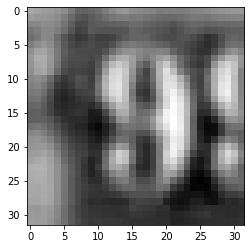

In [25]:
epocs = 40
from keras import optimizers
adam_opt = optimizers.adam(lr = 0.0002)

model = Sequential()
#Adding Input layer and activation functions ReLU
model.add(Dense(1024, kernel_initializer='glorot_normal',input_shape = (1024, )))
#Adding Activation function
model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
model.add(Dense(256, kernel_initializer='glorot_normal'))
#Adding Activation function
model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
model.add(Dense(128, kernel_initializer='glorot_normal'))
#Adding Activation function
model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
model.add(Dense(64, kernel_initializer='glorot_normal'))
#Adding Activation function
model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
model.add(Dense(32, kernel_initializer='glorot_normal'))
#Adding Activation function
model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model.add(Activation('softmax'))
model.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = epocs, verbose = 1)
results = model.evaluate(X_test,y_test)
print("Test Accuracy:",results[1])
print("Test Loss:",results[0])

from matplotlib import pyplot
# plot metrics
pyplot.plot(history.history['accuracy'])
pyplot.title('Epochs vs train accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Train Accuracy')
pyplot.show()

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.title('Epochs vs train loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Train Loss')
pyplot.show()

# plot metrics
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Epochs vs validation accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation Accuracy')
pyplot.show()

# plot metrics
pyplot.plot(history.history['val_loss'])
pyplot.title('Epochs vs Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation Loss')
pyplot.show()

from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
rounded_predictions = model.predict_classes(X_test, batch_size=128, verbose=0)
rounded_labels=np.argmax(y_test, axis=1)
print('Confusion Matrix')
print(confusion_matrix(rounded_labels, rounded_predictions, labels=[0,1,2,3,4,5,6,7,8,9]))
print(" "*100)
from sklearn.metrics import classification_report
print(classification_report(rounded_labels, rounded_predictions, labels=[0,1,2,3,4,5,6,7,8,9]))



print('Predicting Random images')

#Showing the image
plt.imshow(X_test[55].reshape(32,32),cmap='gray')
#Predicting the digits
model.predict_classes(X_test)[55]



#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')
#Predicting the digits
model.predict_classes(X_test)[5]

**Lets try the same keras model with Sigmoid Activation**

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
activation_56 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_57 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_58 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)              

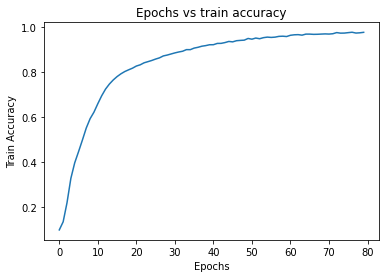

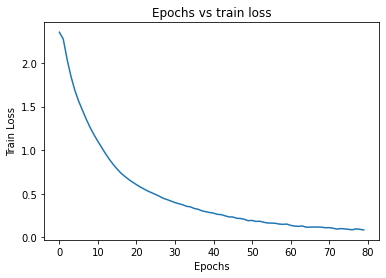

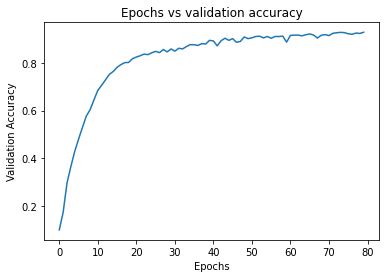

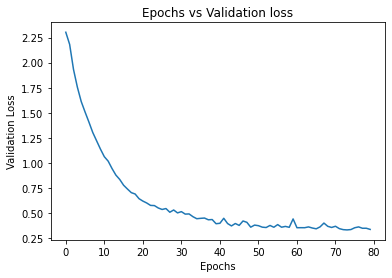

Confusion Matrix
[[1497   17   30   13   90    5   53   11   51   47]
 [  14 1509   16   33  107   29   33   67   10   10]
 [  35   38 1451   44   46   12    9   99   11   58]
 [   9   45   26 1271   17  195   19   31   49   57]
 [  31   94   23    9 1513   16   79   11   22   14]
 [  10   37    7  114   13 1385  103    5   76   18]
 [  33   32    6   12   49   68 1506    9  108    9]
 [  11  129   76   30   25   11    4 1505    6   11]
 [  57   25   10   46   23   91  144    5 1337   74]
 [ 102   32   40   80   24   32   18   17  106 1353]]
                                                                                                    
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1814
           1       0.77      0.83      0.80      1828
           2       0.86      0.80      0.83      1803
           3       0.77      0.74      0.75      1719
           4       0.79      0.83      0.81      1812
           5       0.75   

9

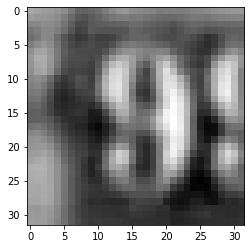

In [26]:
from keras import optimizers
adam_opt = optimizers.adam(lr = 0.0002)
model = Sequential()
#Adding Input layer and activation functions ReLU
model.add(Dense(1024, kernel_initializer='glorot_normal',input_shape = (1024, )))
#Adding Activation function
model.add(Activation('sigmoid'))

#Hidden Layer 1
#Adding first Hidden layer
model.add(Dense(256, kernel_initializer='glorot_normal'))
#Adding Activation function
model.add(Activation('sigmoid'))

#Hidden Layer 2
#Adding second Hidden layer
model.add(Dense(128, kernel_initializer='glorot_normal'))
#Adding Activation function
model.add(Activation('sigmoid'))

#Hidden Layer 3
#Adding third Hidden layer
model.add(Dense(64, kernel_initializer='glorot_normal'))
#Adding Activation function
model.add(Activation('sigmoid'))

#Hidden Layer 4
#Adding fourth Hidden layer
model.add(Dense(32, kernel_initializer='glorot_normal'))
#Adding Activation function
model.add(Activation('sigmoid'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model.add(Activation('softmax'))
model.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 80, verbose = 1)
results = model.evaluate(X_test,y_test)
print("Test Accuracy:",results[1])
print("Test Loss:",results[0])

from matplotlib import pyplot
# plot metrics
pyplot.plot(history.history['accuracy'])
pyplot.title('Epochs vs train accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Train Accuracy')
pyplot.show()

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.title('Epochs vs train loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Train Loss')
pyplot.show()

# plot metrics
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Epochs vs validation accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation Accuracy')
pyplot.show()

# plot metrics
pyplot.plot(history.history['val_loss'])
pyplot.title('Epochs vs Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation Loss')
pyplot.show()

from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
rounded_predictions = model.predict_classes(X_test, batch_size=128, verbose=0)
rounded_labels=np.argmax(y_test, axis=1)
print('Confusion Matrix')
print(confusion_matrix(rounded_labels, rounded_predictions))
print(" "*100)
from sklearn.metrics import classification_report
print(classification_report(rounded_labels, rounded_predictions, labels=[0,1,2,3,4,5,6,7,8,9]))


print('Predicting Random images')

#Showing the image
plt.imshow(X_test[55].reshape(32,32),cmap='gray')
#Predicting the digits
model.predict_classes(X_test)[55]



#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')
#Predicting the digits
model.predict_classes(X_test)[5]

Observations:
* As we can see Relu is a better activation when compared with sigmoid in this example.

# Keras Model with Batch Normalizarion and Dropout

In [0]:
def keras_model_bn_dr(initializer,optimizer,loss,batch,epochs,ver,dr):
  model = Sequential()
  #Adding Input layer and activation functions ReLU
  model.add(Dense(1024, kernel_initializer=initializer,input_shape = (1024, )))
  #Adding Batch Normalization
  model.add(BatchNormalization())
  #Adding Activation function
  model.add(Activation('relu'))
  #Adding Dropout Layer
  model.add(Dropout(dr))

  #Hidden Layer 1
  #Adding first Hidden layer
  model.add(Dense(256, kernel_initializer=initializer))
  #Adding Batch Normalization
  model.add(BatchNormalization())
  #Adding Activation function
  model.add(Activation('relu'))
  #Adding Dropout Layer
  model.add(Dropout(dr))

  #Hidden Layer 2
  #Adding second Hidden layer
  model.add(Dense(128, kernel_initializer=initializer))
  #Adding Batch Normalization
  model.add(BatchNormalization())
  #Adding Activation function
  model.add(Activation('relu'))
  #Adding Dropout Layer
  model.add(Dropout(dr))

  #Hidden Layer 3
  #Adding third Hidden layer
  model.add(Dense(64, kernel_initializer=initializer))
  #Adding Batch Normalization
  model.add(BatchNormalization())
  #Adding Activation function
  model.add(Activation('relu'))
  #Adding Dropout Layer
  model.add(Dropout(dr))

  #Hidden Layer 4
  #Adding fourth Hidden layer
  model.add(Dense(32, kernel_initializer=initializer))
  #Adding Batch Normalization
  model.add(BatchNormalization())
  #Adding Activation function
  model.add(Activation('relu'))
  #Adding Dropout Layer
  model.add(Dropout(dr))

  # Output Layer
  #Adding output layer which is of 10 nodes (digits)
  model.add(Dense(10))
  #Adding Activation function
  # Here, we are using softmax function because we have multiclass classsification
  model.add(Activation('softmax'))
  model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
  history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = batch, epochs = epochs, verbose = ver)
  results = model.evaluate(X_test,y_test)
  print("Test Accuracy:",results[1])
  print("Test Loss:",results[0])

  return history, results

In [0]:
epocs = 80
initializer = ['glorot_normal']
from keras import optimizers
optimizer_lr = [0.0001,0.0002]
batc = [64, 128]
dropo = [0.1,0.2,0.3,0.4]
cols = ['initialization', 'optimizer','optimizer_lr', 'loss_nn', 'batch_size', 'epoch_size', 'dropout','train accuracy', 'val accuracy', 'test accuracy','train loss', 'val loss', 'test loss']
compa_do = pd.DataFrame(columns=cols)

for ker in initializer:
  for optimi in optimizer_lr:
    for ba in batc:
      for d in dropo:
        print('#'*100)
        print(" "*100)
        print("initializer:", ker)
        print("optimizer Learning Rate:", optimi)
        print("batch size:", ba)
        print("Dropout rate in all layers:", d)
        adam_opt = optimizers.adam(lr = optimi)
        hist, model = keras_model_bn_dr(ker, adam_opt,'categorical_crossentropy',ba,epocs,1,d)
        tempResultsDf = pd.DataFrame({'initialization':[ker], 'optimizer':['Adam'], 'optimizer_lr': [optimi], 'loss_nn': ['categorical_crossentropy'], 'batch_size': [ba], 'epoch_size': [epocs],'dropout':[d],'train accuracy':[hist.history['accuracy'][-1]], 'val accuracy': [hist.history['val_accuracy'][-1]], 'test accuracy': [model[1]],'train loss':[hist.history['loss'][-1]], 'val loss': [hist.history['val_loss'][-1]],'test loss': [model[0]]})
        compa_do = pd.concat([compa_do, tempResultsDf])
        print(" "*100)
compa_do

####################################################################################################
                                                                                                    
initializer: glorot_normal
optimizer Learning Rate: 0.0001
batch size: 64
Dropout rate in all layers: 0.1
Train on 42000 samples, validate on 60000 samples
Epoch 1/80
42000/42000 [==============================] - 10s 244us/step - loss: 2.1817 - accuracy: 0.2283 - val_loss: 1.6113 - val_accuracy: 0.5180
Epoch 2/80
42000/42000 [==============================] - 8s 188us/step - loss: 1.6042 - accuracy: 0.4882 - val_loss: 1.2328 - val_accuracy: 0.6592
Epoch 3/80
42000/42000 [==============================] - 8s 190us/step - loss: 1.3179 - accuracy: 0.5990 - val_loss: 1.0035 - val_accuracy: 0.7214
Epoch 4/80
42000/42000 [==============================] - 8s 189us/step - loss: 1.1435 - accuracy: 0.6544 - val_loss: 0.8524 - val_accuracy: 0.7593
Epoch 5/80
42000/42000 [=========================

,initialization,optimizer,optimizer_lr,loss_nn,batch_size,epoch_size,dropout,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,glorot_normal,Adam,0.0001,categorical_crossentropy,64,80,0.1,0.909214,0.941983,0.875889,0.288425,0.207404,0.438648
0,glorot_normal,Adam,0.0001,categorical_crossentropy,64,80,0.2,0.877571,0.926417,0.875667,0.413617,0.254388,0.422215
0,glorot_normal,Adam,0.0001,categorical_crossentropy,64,80,0.3,0.845619,0.906100,0.870000,0.540072,0.320201,0.440680
0,glorot_normal,Adam,0.0001,categorical_crossentropy,64,80,0.4,0.802976,0.890883,0.861778,0.712554,0.387277,0.476166
0,glorot_normal,Adam,0.0001,categorical_crossentropy,128,80,0.1,0.921500,0.937767,0.866722,0.253847,0.221307,0.475934
0,glorot_normal,Adam,0.0001,categorical_crossentropy,128,80,0.2,0.886071,0.923700,0.871944,0.385138,0.264373,0.444067
0,glorot_normal,Adam,0.0001,categorical_crossentropy,128,80,0.3,0.853738,0.909167,0.869667,0.512613,0.314370,0.443076
0,glorot_normal,Adam,0.0001,categorical_crossentropy,128,80,0.4,0.807262,0.891883,0.864111,0.676766,0.382299,0.472738
0,glorot_normal,Adam,0.0002,categorical_crossentropy,64,80,0.1,0.917976,0.943950,0.872889,0.255229,0.203369,0.458527
0,glorot_normal,Adam,0.0002,categorical_crossentropy,64,80,0.2,0.883452,0.933850,0.880500,0.387042,0.234793,0.415956


*As we can see after applying Batch Normalisation and Dropout, our overfit is greatly reduced*

Observations:
* Dropout of 0.2 is giving best test accuracy as well as its test accuracy is close to train accuracy
* Also, validation accuracy is larger than train accuracy because validation size is bigger than train data. After applying data augmentation, we need to compare train and val accuracy.

In [0]:
with open('/content/drive/My Drive/Colab Notebooks/results_with_dropout.csv', 'w') as f:
  compa_do.to_csv(f)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_62 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               262400    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_63 (Activation)   (None, 256)             

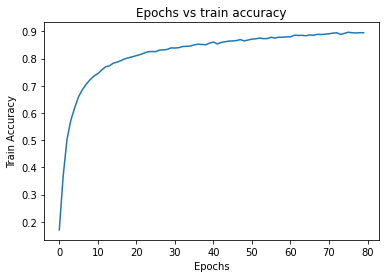

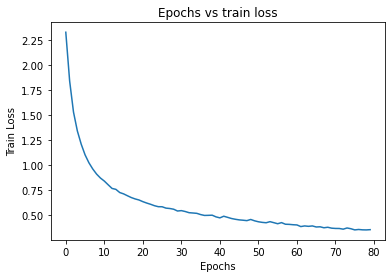

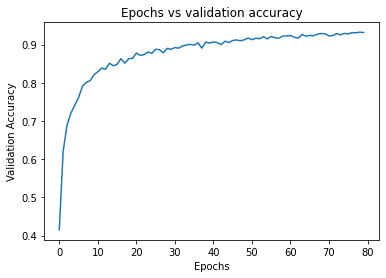

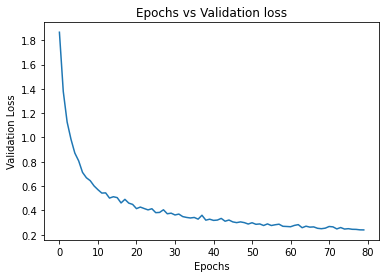

Confusion Matrix
[[1497   17   30   13   90    5   53   11   51   47]
 [  14 1509   16   33  107   29   33   67   10   10]
 [  35   38 1451   44   46   12    9   99   11   58]
 [   9   45   26 1271   17  195   19   31   49   57]
 [  31   94   23    9 1513   16   79   11   22   14]
 [  10   37    7  114   13 1385  103    5   76   18]
 [  33   32    6   12   49   68 1506    9  108    9]
 [  11  129   76   30   25   11    4 1505    6   11]
 [  57   25   10   46   23   91  144    5 1337   74]
 [ 102   32   40   80   24   32   18   17  106 1353]]
                                                                                                    
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1814
           1       0.77      0.83      0.80      1828
           2       0.86      0.80      0.83      1803
           3       0.77      0.74      0.75      1719
           4       0.79      0.83      0.81      1812
           5       0.75   

9

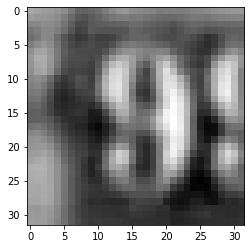

In [27]:
adam_opt = optimizers.adam(lr = 0.0002)
initializer = 'glorot_normal'
dr = 0.2
models = Sequential()
#Adding Input layer and activation functions ReLU
models.add(Dense(1024, kernel_initializer=initializer,input_shape = (1024, )))
#Adding Batch Normalization
models.add(BatchNormalization())
#Adding Activation function
models.add(Activation('relu'))
#Adding Dropout Layer
models.add(Dropout(dr))

#Hidden Layer 1
#Adding first Hidden layer
models.add(Dense(256, kernel_initializer=initializer))
#Adding Batch Normalization
models.add(BatchNormalization())
#Adding Activation function
models.add(Activation('relu'))
#Adding Dropout Layer
models.add(Dropout(dr))

#Hidden Layer 2
#Adding second Hidden layer
models.add(Dense(128, kernel_initializer=initializer))
#Adding Batch Normalization
models.add(BatchNormalization())
#Adding Activation function
models.add(Activation('relu'))
#Adding Dropout Layer
models.add(Dropout(dr))

#Hidden Layer 3
#Adding third Hidden layer
models.add(Dense(64, kernel_initializer=initializer))
#Adding Batch Normalization
models.add(BatchNormalization())
#Adding Activation function
models.add(Activation('relu'))
#Adding Dropout Layer
models.add(Dropout(dr))

#Hidden Layer 4
#Adding fourth Hidden layer
models.add(Dense(32, kernel_initializer=initializer))
#Adding Batch Normalization
models.add(BatchNormalization())
#Adding Activation function
models.add(Activation('relu'))
#Adding Dropout Layer
models.add(Dropout(dr))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
models.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
models.add(Activation('softmax'))
models.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
models.summary()
history = models.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 80, verbose = 1)
results = models.evaluate(X_test,y_test)
print("Test Accuracy:",results[1])
print("Test Loss:",results[0])
from matplotlib import pyplot
# plot metrics
pyplot.plot(history.history['accuracy'])
pyplot.title('Epochs vs train accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Train Accuracy')
pyplot.show()

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.title('Epochs vs train loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Train Loss')
pyplot.show()

# plot metrics
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Epochs vs validation accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation Accuracy')
pyplot.show()

# plot metrics
pyplot.plot(history.history['val_loss'])
pyplot.title('Epochs vs Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation Loss')
pyplot.show()

from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
rounded_predictions = model.predict_classes(X_test, batch_size=128, verbose=0)
rounded_labels=np.argmax(y_test, axis=1)
print('Confusion Matrix')
print(confusion_matrix(rounded_labels, rounded_predictions))
print(" "*100)
from sklearn.metrics import classification_report
print(classification_report(rounded_labels, rounded_predictions, labels=[0,1,2,3,4,5,6,7,8,9]))


print('Predicting Random images')

#Showing the image
plt.imshow(X_test[55].reshape(32,32),cmap='gray')
#Predicting the digits
models.predict_classes(X_test)[55]



#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')
#Predicting the digits
models.predict_classes(X_test)[5]


# **Lets see all the results once**

In [0]:
re1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/res_1.csv')
re2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/res_2.csv')
re = pd.concat([re1,re2])
re

,Unnamed: 0,initialization,optimizer_nn,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,0,uniform,sgd,categorical_crossentropy,32,80,0.989381,0.948000,0.838278,0.032998,0.430561,1.390577
1,0,uniform,sgd,categorical_crossentropy,64,80,0.983905,0.925717,0.818944,0.054221,0.433555,1.241619
2,0,uniform,adam,categorical_crossentropy,32,80,0.960310,0.921533,0.833833,0.145031,0.429565,1.093884
3,0,uniform,adam,categorical_crossentropy,64,80,0.971714,0.932133,0.837389,0.096596,0.380708,1.054292
4,0,uniform,RMSprop,categorical_crossentropy,32,80,0.177524,0.169917,0.164167,4.733351,2.575880,3.413000
5,0,uniform,RMSprop,categorical_crossentropy,64,80,0.919286,0.872950,0.802278,0.408370,1.256907,3.361487
6,0,uniform,Adagrad,categorical_crossentropy,32,80,0.993000,0.950067,0.839167,0.029976,0.379074,1.227416
7,0,uniform,Adagrad,categorical_crossentropy,64,80,0.995881,0.951533,0.842778,0.019746,0.382283,1.244642
8,0,he_normal,sgd,categorical_crossentropy,32,80,0.992048,0.944050,0.830278,0.025449,0.474913,1.525340
9,0,he_normal,sgd,categorical_crossentropy,64,80,0.995119,0.947617,0.832778,0.017720,0.429459,1.400959


In [0]:
a = pd.read_csv('/content/drive/My Drive/Colab Notebooks/adam_lr.csv')
b = pd.read_csv('/content/drive/My Drive/Colab Notebooks/adam_lr_2.csv')
ress = pd.concat([a,b])
ress

,Unnamed: 0,initialization,optimizer,optimizer_lr,loss_nn,batch_size,epoch_size,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,0,glorot_normal,Adam,0.00001,categorical_crossentropy,32,80,0.974667,0.936883,0.835444,0.112915,0.285041,0.712660
1,0,glorot_normal,Adam,0.00001,categorical_crossentropy,64,80,0.950452,0.915333,0.825278,0.199186,0.336585,0.673792
2,0,glorot_normal,Adam,0.00010,categorical_crossentropy,32,80,0.985738,0.945633,0.840667,0.047221,0.426965,1.354301
3,0,glorot_normal,Adam,0.00010,categorical_crossentropy,64,80,0.986714,0.945383,0.843222,0.041416,0.401097,1.256190
4,0,glorot_normal,Adam,0.00100,categorical_crossentropy,32,80,0.953095,0.928467,0.835778,0.161399,0.388151,1.045278
5,0,glorot_normal,Adam,0.00100,categorical_crossentropy,64,80,0.963024,0.917450,0.829111,0.125650,0.420861,1.056400
6,0,glorot_normal,Adam,0.10000,categorical_crossentropy,32,80,0.099762,0.100000,0.101556,2.315604,2.313027,2.313237
7,0,glorot_normal,Adam,0.10000,categorical_crossentropy,64,80,0.102643,0.100000,0.100667,2.311494,2.307754,2.307270
8,0,glorot_normal,Adam,0.50000,categorical_crossentropy,32,80,0.101738,0.100033,0.098278,2.358407,672.067808,2718.305179
9,0,glorot_normal,Adam,0.50000,categorical_crossentropy,64,80,0.097190,0.100000,0.101556,2.341444,2.332082,2.332454


In [0]:
dodo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/results_with_dropout.csv')
dodo

,Unnamed: 0,initialization,optimizer,optimizer_lr,loss_nn,batch_size,epoch_size,dropout,train accuracy,val accuracy,test accuracy,train loss,val loss,test loss
0,0,glorot_normal,Adam,0.0001,categorical_crossentropy,64,80,0.1,0.909214,0.941983,0.875889,0.288425,0.207404,0.438648
1,0,glorot_normal,Adam,0.0001,categorical_crossentropy,64,80,0.2,0.877571,0.926417,0.875667,0.413617,0.254388,0.422215
2,0,glorot_normal,Adam,0.0001,categorical_crossentropy,64,80,0.3,0.845619,0.906100,0.870000,0.540072,0.320201,0.440680
3,0,glorot_normal,Adam,0.0001,categorical_crossentropy,64,80,0.4,0.802976,0.890883,0.861778,0.712554,0.387277,0.476166
4,0,glorot_normal,Adam,0.0001,categorical_crossentropy,128,80,0.1,0.921500,0.937767,0.866722,0.253847,0.221307,0.475934
5,0,glorot_normal,Adam,0.0001,categorical_crossentropy,128,80,0.2,0.886071,0.923700,0.871944,0.385138,0.264373,0.444067
6,0,glorot_normal,Adam,0.0001,categorical_crossentropy,128,80,0.3,0.853738,0.909167,0.869667,0.512613,0.314370,0.443076
7,0,glorot_normal,Adam,0.0001,categorical_crossentropy,128,80,0.4,0.807262,0.891883,0.864111,0.676766,0.382299,0.472738
8,0,glorot_normal,Adam,0.0002,categorical_crossentropy,64,80,0.1,0.917976,0.943950,0.872889,0.255229,0.203369,0.458527
9,0,glorot_normal,Adam,0.0002,categorical_crossentropy,64,80,0.2,0.883452,0.933850,0.880500,0.387042,0.234793,0.415956


Best model so far would be 
* initialization = 'glorat_normal'
* optimizer = Adam with learning rate = 0.0002
* batch_size = 64
* epoch_size = 80
* Dropout rate in each layer = 0.2 

# Keras model with Data Augmentation

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
%matplotlib inline
h5f = h5py.File('/content/drive/My Drive/neural_1_ass/SVHN_single_grey1.h5','r')
print("Lets see what h5py file consists:",h5f.keys())
X_train_da = h5f['X_train'][:]
y_train_da = h5f['y_train'][:]
X_test_da = h5f['X_test'][:]
y_test_da = h5f['y_test'][:]
X_val_da = h5f['X_val'][:]
y_val_da = h5f['y_val'][:]
h5f.close()

Lets see what h5py file consists: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [10]:
print("X train with data augmentation shape", X_train_da.shape)
print("X test with data augmentation shape", X_test_da.shape)
print("X val with data augmentation shape",X_val_da.shape)
print("y train with data augmentation shape", y_train_da.shape)
print("y test with data augmentation shape", y_test_da.shape)
print("y val with data augmentation shape",y_val_da.shape)

X train with data augmentation shape (42000, 32, 32)
X test with data augmentation shape (18000, 32, 32)
X val with data augmentation shape (60000, 32, 32)
y train with data augmentation shape (42000,)
y test with data augmentation shape (18000,)
y val with data augmentation shape (60000,)


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
def sharpen(im):
  kernel = np.array([[-1,-1,-1], [-1,7,-1], [-1,-1,-1]])
  im = cv2.filter2D(im, -1, kernel)
  return im
def fill(img, h, w):
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img
def zoom(img, value):
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken]
    img = fill(img, h, w)
    return img

In [12]:
randomList = []
# Set a length of the list to 10
for i in range(0, 1000):
    # any random numbers from 0 to 1000
    randomList.append(random.randint(0, 42000))

print("Printing list of random numbers")
print("Random list genearted:",randomList)
used = set()
unique = [x for x in randomList if x not in used and (used.add(x) or True)]
print("Unique indices:", unique)

Printing list of random numbers
Random list genearted: [35952, 29606, 41102, 29743, 12402, 34816, 21371, 18057, 19876, 25746, 1548, 36558, 35420, 16668, 23025, 28378, 17641, 11232, 28756, 28736, 31458, 10719, 26431, 55, 22056, 7668, 35490, 2231, 39953, 25635, 18890, 2167, 9306, 39712, 6282, 32621, 6328, 221, 40021, 19430, 20610, 5687, 8333, 38514, 8023, 8322, 18382, 15412, 5208, 18118, 20784, 29806, 30817, 26027, 29094, 6072, 6706, 2951, 24195, 17647, 8504, 34592, 17073, 2172, 29252, 16574, 27450, 20139, 15861, 13418, 40189, 35465, 40307, 8009, 15469, 6762, 19013, 14932, 30889, 21864, 30366, 4133, 14598, 40444, 3565, 32663, 3283, 31413, 34407, 35643, 32023, 9079, 12532, 7604, 19516, 15081, 40819, 4129, 32018, 13075, 19099, 6560, 20439, 36382, 15347, 9123, 3111, 21123, 35807, 9472, 11094, 28205, 16619, 5147, 28001, 13160, 18084, 9430, 28925, 18713, 7155, 37784, 2320, 36744, 35875, 35518, 22, 11823, 10740, 854, 11200, 4807, 34689, 40025, 10786, 5219, 20343, 38487, 10509, 15216, 23814, 25

In [0]:
for ind in unique:
  X_train_da = np.vstack((X_train_da, np.expand_dims(np.array(sharpen(X_train_da[ind-1]), dtype= float), axis=0)))
  y_train_da = np.append(y_train_da, y_train_da[ind-1])
  
  X_train_da = np.vstack((X_train_da, np.expand_dims(np.array(zoom(X_train_da[ind], 0.7), dtype= float), axis=0)))
  y_train_da = np.append(y_train_da, y_train_da[ind-1])
s = np.arange(X_train_da.shape[0])
np.random.shuffle(s)

X_train_da = X_train_da[s]
y_train_da = y_train_da[s]


In [14]:
#reshaping matrix to linear array
X_train_da = X_train_da.reshape(X_train_da.shape[0],X_train_da.shape[1]*X_train_da.shape[2])
X_test_da = X_test_da.reshape(X_test_da.shape[0],X_test_da.shape[1]*X_test_da.shape[2])
X_val_da = X_val_da.reshape(X_val_da.shape[0],X_val_da.shape[1]*X_val_da.shape[2])

X_train_da = (X_train_da-X_train_da.mean())/X_train_da.std()
X_test_da = (X_test_da - X_test_da.mean())/X_test_da.std()
X_val_da = (X_val_da-X_val_da.mean())/X_val_da.std()

y_train_da = tf.keras.utils.to_categorical(y_train_da, num_classes=10)
y_test_da = tf.keras.utils.to_categorical(y_test_da, num_classes=10)
y_val_da = tf.keras.utils.to_categorical(y_val_da, num_classes=10)

print("X train with data augmentation shape after reshaping to linear array", X_train_da.shape)
print("X test with data augmentation shape reshaping to linear array", X_test_da.shape)
print("X val with data augmentation shape reshaping to linear array",X_val_da.shape)
print("y train with data augmentation shape reshaping to linear array", y_train_da.shape)
print("y test with data augmentation shape reshaping to linear array", y_test_da.shape)
print("y val with data augmentation shape reshaping to linear array",y_val_da.shape)

X train with data augmentation shape after reshaping to linear array (43970, 1024)
X test with data augmentation shape reshaping to linear array (18000, 1024)
X val with data augmentation shape reshaping to linear array (60000, 1024)
y train with data augmentation shape reshaping to linear array (43970, 10)
y test with data augmentation shape reshaping to linear array (18000, 10)
y val with data augmentation shape reshaping to linear array (60000, 10)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_44 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               262400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_45 (Activation)   (None, 256)              

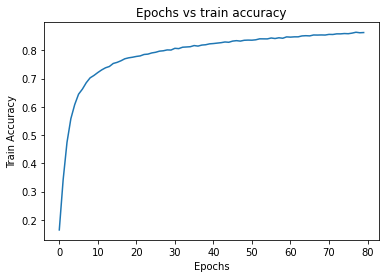

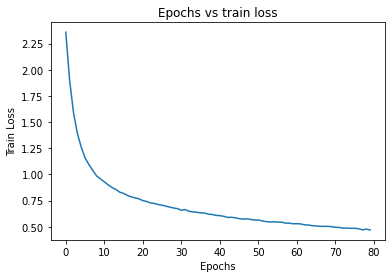

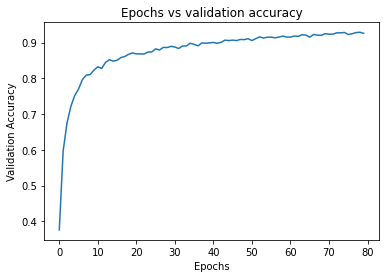

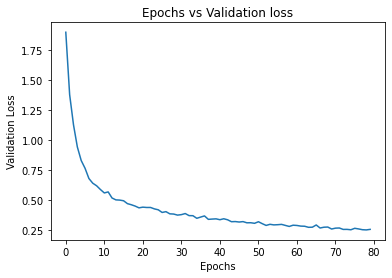

Confusion Matrix
[[1653   18   15   14   16    3   21   15   19   40]
 [  26 1610   40   20   39    7   16   45   16    9]
 [  14   23 1621   22   18    7    5   33   23   37]
 [  11   29   50 1409   12   95   17   24   53   19]
 [  15   40   19   13 1627    6   24   10   29   29]
 [  11   13   17   66    7 1525   46    7   48   28]
 [  54   18   11   15   16   58 1541   11   88   20]
 [  21   49   35   18   13   10    8 1629   10   15]
 [  38   25   27   41    6   20   70    8 1529   48]
 [  57   23   24   34   14   42   11   14   49 1536]]
                                                                                                    
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1814
           1       0.87      0.88      0.88      1828
           2       0.87      0.90      0.89      1803
           3       0.85      0.82      0.84      1719
           4       0.92      0.90      0.91      1812
           5       0.86   

In [15]:
initializer = 'glorot_normal'
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf
adam_opt = optimizers.adam(lr = 0.0002)
model_aug = Sequential()
#Adding Input layer and activation functions ReLU
model_aug.add(Dense(1024, kernel_initializer=initializer,input_shape = (1024, )))
#Adding Batch Normalization
model_aug.add(BatchNormalization())
#Adding Activation function
model_aug.add(Activation('relu'))
#Adding Dropout Layer
model_aug.add(Dropout(0.2))

#Hidden Layer 1
#Adding first Hidden layer
model_aug.add(Dense(256, kernel_initializer=initializer))
#Adding Batch Normalization
model_aug.add(BatchNormalization())
#Adding Activation function
model_aug.add(Activation('relu'))
#Adding Dropout Layer
model_aug.add(Dropout(0.2))

#Hidden Layer 2
#Adding second Hidden layer
model_aug.add(Dense(128, kernel_initializer=initializer))
#Adding Batch Normalization
model_aug.add(BatchNormalization())
#Adding Activation function
model_aug.add(Activation('relu'))
#Adding Dropout Layer
model_aug.add(Dropout(0.2))

#Hidden Layer 3
#Adding third Hidden layer
model_aug.add(Dense(64, kernel_initializer=initializer))
#Adding Batch Normalization
model_aug.add(BatchNormalization())
#Adding Activation function
model_aug.add(Activation('relu'))
#Adding Dropout Layer
model_aug.add(Dropout(0.2))

#Hidden Layer 4
#Adding fourth Hidden layer
model_aug.add(Dense(32, kernel_initializer=initializer))
#Adding Batch Normalization
model_aug.add(BatchNormalization())
#Adding Activation function
model_aug.add(Activation('relu'))
#Adding Dropout Layer
model_aug.add(Dropout(0.2))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model_aug.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model_aug.add(Activation('softmax'))
model_aug.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_aug.summary()

history = model_aug.fit(X_train_da, y_train_da, validation_data=(X_val_da,y_val_da),batch_size = 128, epochs = 80, verbose = 1)


results = model_aug.evaluate(X_test_da,y_test_da)
print("Test Accuracy:",results[1])
print("Test Loss:",results[0])


from matplotlib import pyplot
# plot metrics
pyplot.plot(history.history['accuracy'])
pyplot.title('Epochs vs train accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Train Accuracy')
pyplot.show()

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.title('Epochs vs train loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Train Loss')
pyplot.show()

# plot metrics
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Epochs vs validation accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation Accuracy')
pyplot.show()

# plot metrics
pyplot.plot(history.history['val_loss'])
pyplot.title('Epochs vs Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation Loss')
pyplot.show()

from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
rounded_predictions = model_aug.predict_classes(X_test_da, batch_size=128, verbose=0)
rounded_labels=np.argmax(y_test_da, axis=1)
print('Confusion Matrix')
print(confusion_matrix(rounded_labels, rounded_predictions))
print(" "*100)
from sklearn.metrics import classification_report
print(classification_report(rounded_labels, rounded_predictions, labels=[0,1,2,3,4,5,6,7,8,9]))

# Predicting random image

1

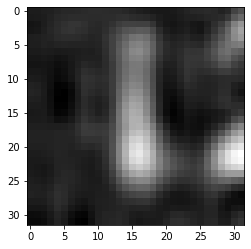

In [17]:
#Showing the image
plt.imshow(X_test[56].reshape(32,32),cmap='gray')
#Predicting the digits
model_aug.predict_classes(X_test_da)[56]

9

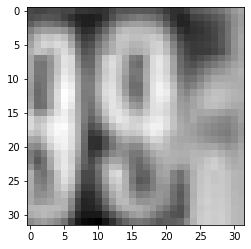

In [18]:
#Showing the image
plt.imshow(X_test[112].reshape(32,32),cmap='gray')
#Predicting the digits
model_aug.predict_classes(X_test_da)[112]

9

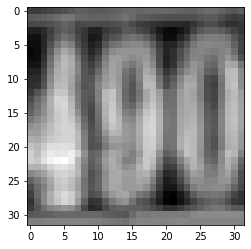

In [19]:
#Showing the image
plt.imshow(X_test[28].reshape(32,32),cmap='gray')
#Predicting the digits
model_aug.predict_classes(X_test_da)[28]

# Let us train on validation data given and validate on train data as the validation size is bigger than train data in the given .h5f file

This below model is a bad idea if validation and test data came from same data initially, because there will be a chance of data leakage.

Lets see what h5py file consists: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>
X train with data augmentation shape after reshaping to linear array (60000, 1024)
X test with data augmentation shape reshaping to linear array (18000, 1024)
X val with data augmentation shape reshaping to linear array (42000, 1024)
y train with data augmentation shape reshaping to linear array (60000, 10)
y test with data augmentation shape reshaping to linear array (18000, 10)
y val with data augmentation shape reshaping to linear array (42000, 10)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_16 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_31 (A

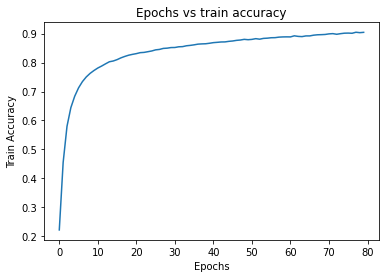

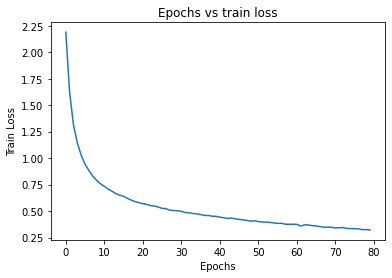

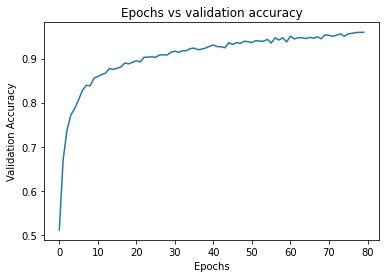

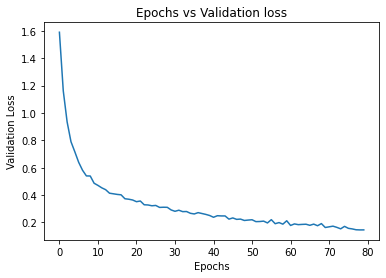

Confusion Matrix
[[1776    9    2    3    5    0    5    6    4    4]
 [   6 1780    5    3   12    7    1    9    3    2]
 [   4    9 1747    9    5    2    0   19    3    5]
 [   2   18   18 1607    8   33    3   12    9    9]
 [   3   20    7    3 1768    0    3    1    3    4]
 [   4    7    9   25    5 1676   21    3   11    7]
 [  17    8    4    2   19   19 1739    4   14    6]
 [   4   20    6    6    4    0    2 1760    2    4]
 [  12   15   10    8    2    3   32    1 1703   26]
 [  11   10   12    6    7   15    5   10   10 1718]]
                                                                                                    
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1814
           1       0.94      0.97      0.96      1828
           2       0.96      0.97      0.96      1803
           3       0.96      0.93      0.95      1719
           4       0.96      0.98      0.97      1812
           5       0.95   

In [18]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
%matplotlib inline
h5f = h5py.File('/content/drive/My Drive/neural_1_ass/SVHN_single_grey1.h5','r')
print("Lets see what h5py file consists:",h5f.keys())
X_train = h5f['X_val'][:]
y_train = h5f['y_val'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_train'][:]
y_val = h5f['y_train'][:]
h5f.close()
#reshaping matrix to linear array
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1]*X_val.shape[2])

X_train = (X_train-X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()
X_val = (X_val-X_val.mean())/X_val.std()

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

print("X train with data augmentation shape after reshaping to linear array", X_train.shape)
print("X test with data augmentation shape reshaping to linear array", X_test.shape)
print("X val with data augmentation shape reshaping to linear array",X_val.shape)
print("y train with data augmentation shape reshaping to linear array", y_train.shape)
print("y test with data augmentation shape reshaping to linear array", y_test.shape)
print("y val with data augmentation shape reshaping to linear array",y_val.shape)



initializer = 'glorot_normal'
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
import tensorflow as tf
adam_opt = optimizers.adam(lr = 0.0002)
model_aug = Sequential()
#Adding Input layer and activation functions ReLU
model_aug.add(Dense(1024, kernel_initializer=initializer,input_shape = (1024, )))
#Adding Batch Normalization
model_aug.add(BatchNormalization())
#Adding Activation function
model_aug.add(Activation('relu'))
#Adding Dropout Layer
model_aug.add(Dropout(0.2))

#Hidden Layer 1
#Adding first Hidden layer
model_aug.add(Dense(256, kernel_initializer=initializer))
#Adding Batch Normalization
model_aug.add(BatchNormalization())
#Adding Activation function
model_aug.add(Activation('relu'))
#Adding Dropout Layer
model_aug.add(Dropout(0.2))

#Hidden Layer 2
#Adding second Hidden layer
model_aug.add(Dense(128, kernel_initializer=initializer))
#Adding Batch Normalization
model_aug.add(BatchNormalization())
#Adding Activation function
model_aug.add(Activation('relu'))
#Adding Dropout Layer
model_aug.add(Dropout(0.2))

#Hidden Layer 3
#Adding third Hidden layer
model_aug.add(Dense(64, kernel_initializer=initializer))
#Adding Batch Normalization
model_aug.add(BatchNormalization())
#Adding Activation function
model_aug.add(Activation('relu'))
#Adding Dropout Layer
model_aug.add(Dropout(0.2))

#Hidden Layer 4
#Adding fourth Hidden layer
model_aug.add(Dense(32, kernel_initializer=initializer))
#Adding Batch Normalization
model_aug.add(BatchNormalization())
#Adding Activation function
model_aug.add(Activation('relu'))
#Adding Dropout Layer
model_aug.add(Dropout(0.2))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model_aug.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model_aug.add(Activation('softmax'))
model_aug.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_aug.summary()
history = model_aug.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 128, epochs = 80, verbose = 1)


results = model_aug.evaluate(X_test,y_test)
print("Test Accuracy:",results[1])
print("Test Loss:",results[0])


from matplotlib import pyplot
# plot metrics
pyplot.plot(history.history['accuracy'])
pyplot.title('Epochs vs train accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Train Accuracy')
pyplot.show()

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.title('Epochs vs train loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Train Loss')
pyplot.show()

# plot metrics
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Epochs vs validation accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation Accuracy')
pyplot.show()

# plot metrics
pyplot.plot(history.history['val_loss'])
pyplot.title('Epochs vs Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Validation Loss')
pyplot.show()

from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
rounded_predictions = model_aug.predict_classes(X_test, batch_size=128, verbose=0)
rounded_labels=np.argmax(y_test, axis=1)
print('Confusion Matrix')
print(confusion_matrix(rounded_labels, rounded_predictions))
print(" "*100)
from sklearn.metrics import classification_report
print(classification_report(rounded_labels, rounded_predictions, labels=[0,1,2,3,4,5,6,7,8,9]))

Observations:
* Previously we received an test accuracy around 87% only, this is because we had few training data
* When we interchanged train and validation data that is, we trained on validation data and validated on training data, we got 95.996% test accuracy.

# Conclusions:
* Initial models have test accuracy of 84.5-85 % and also there was a lot of overfit as train accuracy reached 99% and validation around 95%.
* After adding batch normalisation and dropout, overfitting is greatly reduced, Almost in all cases, train and test accuracy were approximately same.
* Neural Networks are pretty good if and only if there is large data



* Data was fetched and understood
* Implemented deep neural network with Batch Normalisation as well as dropout
* Applied Data Augmentation on train data and implemented model
* Confusion matrix and metrics were caluclated

Best Model:
* initializer = 'Glorat Normal', optimizer = Adam with lr = 0.0002, epochs = 80, batch size = 128, activation = 'relu', and dropout = 0.2 for all layers hidden. 
